# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [13]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [6]:
X = data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']]

In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform(X_test)

Обучаем модель

In [28]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [29]:
predictions = model.predict_proba(X_test)

In [30]:
predictions

array([[0.37451939, 0.62548061],
       [0.92524458, 0.07475542],
       [0.68439753, 0.31560247],
       ...,
       [0.54096473, 0.45903527],
       [0.79771177, 0.20228823],
       [0.77238964, 0.22761036]])

In [31]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.6254806057528772, 0)
(0.07475541715180554, 0)
(0.31560246784491247, 0)
(0.2902323616306086, 0)
(0.227610357174956, 1)
(0.21513267195409186, 0)
(0.14898595930579947, 0)
(0.202119632300601, 0)
(0.7453335325215045, 1)
(0.4060722939358921, 0)
(0.12798113283806448, 0)
(0.16223254114539207, 0)
(0.09673829230849235, 0)
(0.27197771735203824, 0)
(0.7132235076084249, 1)
(0.5328476784817339, 0)
(0.2838866224486587, 0)
(0.7053150801279638, 1)
(0.31892969322442905, 0)
(0.18718625195457717, 0)
(0.23955462845926914, 1)
(0.4292797357090639, 1)
(0.08103374986958152, 1)
(0.4620215551422112, 1)
(0.152126384709525, 0)
(0.16479356396496575, 0)
(0.4082840646448684, 0)
(0.33348061961946496, 0)
(0.24763869435342628, 0)
(0.1618908856530154, 0)
(0.1190089834798462, 0)
(0.30197934685779326, 1)
(0.23477425406348024, 0)
(0.4977803087931007, 1)
(0.6483649917108121, 1)
(0.42032466527390777, 1)
(0.18731582678211456, 0)
(0.22138114494151778, 0)
(0.30502990001303604, 1)
(0.12388814305092277, 0)
(0.3458017928645208, 

In [32]:
model.score(X_test, Y_test)

0.7319371727748691

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [39]:
for i in range(10):
    m = LogisticRegression(random_state=i)
    m.fit(X_train, Y_train)
    print(m.coef_)
    print(m.score(X_test, Y_test))

[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.78002834 -0.04479953 -0.3375097  -0.07937977
   0.15941509 -0.02043876]]
0.7319371727748691
[[-0.68873685 -0.37109272  0.780

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

In [38]:
m.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=9, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Оценка качества модели

Считаем accuracy последней модели

In [41]:
a = [1,2,3]
b = [4,5,6]

In [42]:
for pair in zip(a, b):
    print(pair)

(1, 4)
(2, 5)
(3, 6)


In [40]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [43]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [44]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [46]:
recall = tp / (tp + fn)
recall

0.3723228995057661

### Используем готовые библиотеки

In [47]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [59]:
precision, recall, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [60]:
recall

array([1.        , 0.99835255, 0.99835255, ..., 0.00329489, 0.00164745,
       0.        ])

In [61]:
# посмотрим что получилось
for line in zip( precision, recall, thres ):
    print( line )

(0.32356076759061836, 1.0, 0.0768051628366278)
(0.3232, 0.9983525535420099, 0.07827638319052091)
(0.3233724653148346, 0.9983525535420099, 0.07866805167478229)
(0.32354511478910836, 0.9983525535420099, 0.07872692578881668)
(0.32371794871794873, 0.9983525535420099, 0.07983633953666823)
(0.3238909673971138, 0.9983525535420099, 0.07990914178638842)
(0.3240641711229946, 0.9983525535420099, 0.0806088596753414)
(0.32423756019261635, 0.9983525535420099, 0.08068660825001478)
(0.3238758029978587, 0.9967051070840197, 0.08092426888191485)
(0.32404927691483665, 0.9967051070840197, 0.08103374986958152)
(0.3236870310825295, 0.9950576606260296, 0.08146685464970767)
(0.32386058981233246, 0.9950576606260296, 0.08295557345488662)
(0.3240343347639485, 0.9950576606260296, 0.08321405412092554)
(0.32420826623725174, 0.9950576606260296, 0.08332635206053422)
(0.3245566899516389, 0.9950576606260296, 0.083473540892224)
(0.3247311827956989, 0.9950576606260296, 0.08400586753299526)
(0.32490586336740185, 0.99505766

In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fantomius/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


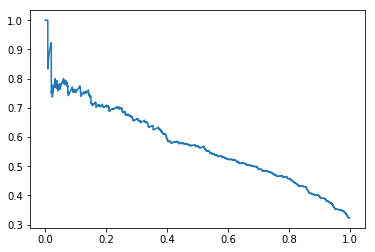

In [63]:
plt.plot( recall, precision )

In [65]:
from sklearn.metrics import average_precision_score

In [66]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761214140827523

### ROC

In [67]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [68]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [69]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9290974645191579)
(0.0, 0.0016474464579901153, 0.9290974645191578)
(0.0, 0.008237232289950576, 0.8994452384139643)
(0.0007674597083653108, 0.008237232289950576, 0.8979584910550614)
(0.0007674597083653108, 0.019769357495881382, 0.8649459574410563)
(0.0030698388334612432, 0.019769357495881382, 0.8546922364154753)
(0.0030698388334612432, 0.023064250411861616, 0.854367815758128)
(0.003837298541826554, 0.023064250411861616, 0.8521119908085357)
(0.003837298541826554, 0.032948929159802305, 0.8336032620330018)
(0.004604758250191865, 0.032948929159802305, 0.8333915795611624)
(0.004604758250191865, 0.03789126853377265, 0.8250739078294641)
(0.005372217958557176, 0.03789126853377265, 0.8228513778075236)
(0.005372217958557176, 0.04118616144975288, 0.8185288207566459)
(0.0061396776669224865, 0.04118616144975288, 0.8184996627800503)
(0.0061396776669224865, 0.047775947281713346, 0.8093837200124808)
(0.006907137375287797, 0.047775947281713346, 0.808980392527583)
(0.006907137375287797, 0.05

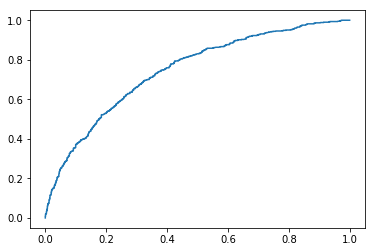

In [70]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [71]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [72]:
model2 = LogisticRegression()

In [73]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [74]:
model2.fit( X_train_short, Y_train )

/Users/fantomius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
predictions2 = model2.predict_proba( X_test_short )

In [76]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

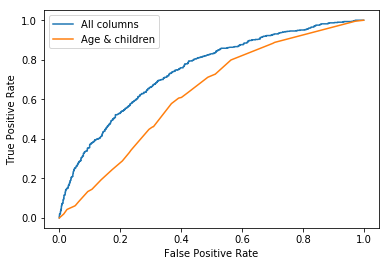

In [77]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451249871984685

In [80]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [81]:
from sklearn.metrics import auc

In [82]:
auc( fpr, tpr )

0.7451249871984685

In [83]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [ ]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [ ]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [ ]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

In [ ]:
Y = data['affair']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [ ]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()